## Lena teaches the FRC

In this analysis we make use of $(512\times512)$ Lena image
to show the underlying relation between the Fourier Ring Correlation
(FRC) and the Signal-to-Noise Ratio (SNR). We will also show how a
particular threshold is formulated and how diagonal splitting of an
image perturbs the corresponding FRC result.

In [1]:
import sys
import secondary_utils as su
import frc_utils as frc_util
import imageio
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

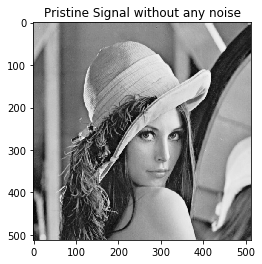

In [2]:
lena  = su.imageio_imread('./demo_images/lena_gray.jpg')
lena  = lena[:, :, 1]
lena  = lena.astype(np.float)
lena  = su.normalize_data_ab(0, 1, lena)

#average true signal in each pixel of lena 
h, w = lena.shape
plt.imshow(lena, cmap='Greys_r')
plt.title('Pristine Signal without any noise')
plt.show()

For the FRC analysis we consider two different measurements of the same signal

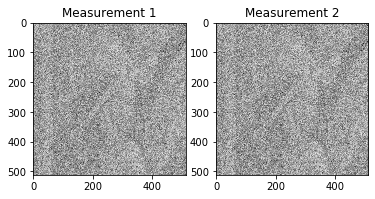

In [3]:
noisy_lena1 = su.imageio_imread('./demo_images/noisy_lena1.tif')
noisy_lena2 = su.imageio_imread('./demo_images/noisy_lena2.tif')
f, axrr = plt.subplots(1, 2)
axrr[0].imshow(noisy_lena1, cmap='Greys_r')
axrr[0].set_title('Measurement 1')
axrr[1].imshow(noisy_lena1, cmap='Greys_r')
axrr[1].set_title('Measurement 2')
plt.show()

The FRC between images $1$ and $2$ is defined as:
\begin{equation}\text{FRC}_{12}(q_{i})=\frac{\underset{q\epsilon q_{i}}{\sum}F_{1}(q)\cdot F_{2}(q)^{*}}{\sqrt{\underset{q\epsilon q_{i}}{\sum}F_{1}^{2}(q)\cdot\underset{q\epsilon q_{i}}{\sum}F_{2}^{2}(q)}}.\end{equation}

Note that $F_{1}(q)$ is the Fourier transform of image 1 and $F_{2}(q)^{*}$
is the complex conjugate of the Fourier transform of image 2. Likewise
$q\ \epsilon\ q_{i}$ is the ring at radius $i$ in the frequency
domain of any of the two images. 

ring plots is: True
performed by index method


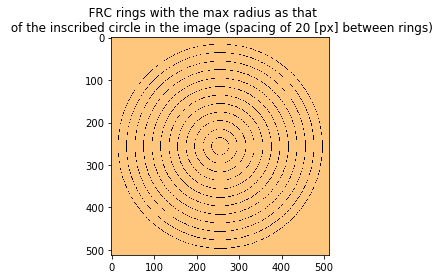

In [4]:
_ = frc_util.ring_indices(noisy_lena1, inscribed_rings=True, plot=True)

ring plots is: True
performed by index method


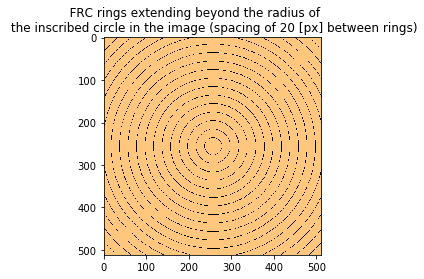

In [5]:
_ = frc_util.ring_indices(noisy_lena1, inscribed_rings=False, plot=True)

FRC from noisy measurements of Lena image is as follows: 

In [6]:
inscribed_rings=True
anaRing=True 
xf, frc, _, _ = frc_util.FRC(noisy_lena1, noisy_lena2, inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)

performed by index method
performed by index method
performed by index method
[*] Performing half-bit thresholding


/home/beams0/PKC/Implementations/emprise_state_brain/FRC/pycodes/FRC_v3/frc_utils.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  C  = C.astype(np.float64)
/home/beams0/PKC/Implementations/emprise_state_brain/FRC/pycodes/FRC_v3/frc_utils.py:267: ComplexWarning: Casting complex values to real discards the imaginary part
  C1 = C1.astype(np.float64)
/home/beams0/PKC/Implementations/emprise_state_brain/FRC/pycodes/FRC_v3/frc_utils.py:268: ComplexWarning: Casting complex values to real discards the imaginary part
  C2 = C2.astype(np.float64)


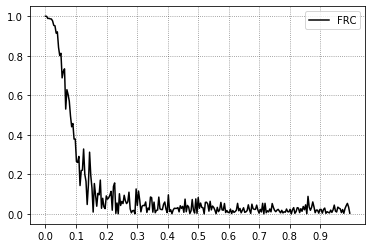

In [7]:
plt.plot(xf[:-1], frc[:-1], label = 'FRC', color='black')
plt.xticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

The signal component in both the measurements/images is considered to be the same while they differ with each other in-term of their corresponding noise components such that:
\begin{equation}
F_{1}(q)=S(q)+N_{1}(q),\label{eq:Sig-noise-img1}
\end{equation}

\begin{equation}
F_{2}(q)=S(q)+N_{2}(q).\label{eq:Sig-noise-img2}
\end{equation}

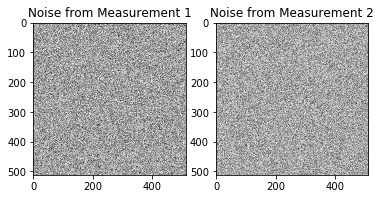

In [8]:
signal = lena
noise1 = noisy_lena1 - lena
noise2 = noisy_lena2 - lena
f, axrr = plt.subplots(1, 2)

#f.colorbar(axrr[0].imshow(noise1, cmap='Greys_r'), ax=axrr[0])
axrr[0].imshow(noise1, cmap='Greys_r')
axrr[0].set_title('Noise from Measurement 1')
axrr[1].imshow(noise2, cmap='Greys_r')
axrr[1].set_title('Noise from Measurement 2')
plt.show()

Now, if we use the SNR definition (${\text{SNR}}_{1}\equiv\bar{S^{2}}/\bar{N_{1}^{2}}$),
the formula for FRC can be written in-terms of SNR as follows:

\begin{equation}
\text{FRC}(q_{i})=\frac{\text{SNR}(q_{i})+2\frac{\sqrt{\text{SNR}(q_{i})}}{\sqrt{n(q_{i})}}+\frac{1}{\sqrt{n(q_{i})}}}{\text{SNR}(q_{i})+2\frac{\sqrt{\text{SNR}(q_{i})}}{\sqrt{n(q_{i})}}+1}.\label{eq:FRC_def_using_SNR}
\end{equation}

Rather than using the average SNR value for each image, if we use the SNR value for each pixel in the ring $q_{i}$ , we will observe that FRC plot Fourier Transforms of the measurements aligns close with the FRC definition using SNR of these measurements.

ring plots is: False
performed by index method


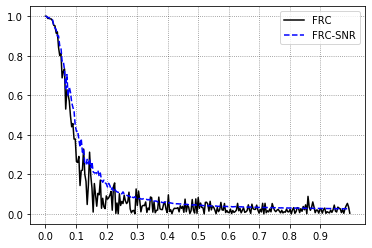

In [9]:
r_ind = frc_util.ring_indices(noisy_lena1, inscribed_rings=inscribed_rings, plot=False)
fft_lena     = fft.fftshift(fft.fft2(lena))
fft_n1       = fft.fftshift(fft.fft2(noise1))
frc4rmSNR    = frc_util.frc_4rm_snr(r_ind, fft_lena, fft_n1)
                                 
plt.plot(xf[:-1], frc[:-1], label = 'FRC', color='black')
plt.plot(xf[:-1], frc4rmSNR[:-1], '--', label = 'FRC-SNR', color='blue')                                
plt.xticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

Generally, we may have \textit{aprior} knowledge that on average each
pixel in our image exhibits $1/2-\text{bit}$ of information. This
knowledge in-turn implies that the SNR for this particular measurement
is $0.4142$ since

$(1/2-\text{bit}=\log_{2}(1.4142)=\log_{2}(1+0.4142)=\log_{2}(1+\text{SNR})).$

Now, we can define $1/2-\text{}$ bit FRC thresholds making use of
the aforementioned analysis as:

\begin{equation}
\text{T}_{1/2-\text{bit}}=\frac{0.4142+\frac{2.2872}{\sqrt{n(q_{i})}}}{1.4142+\frac{1.2872}{\sqrt{n(q_{i})}}}.\label{eq:half-bit-threshold}
\end{equation}

In [10]:
_, _, x_T, T = frc_util.FRC(noisy_lena1, noise2, thresholding='half-bit')

performed by index method
performed by index method
performed by index method
[*] Performing half-bit thresholding


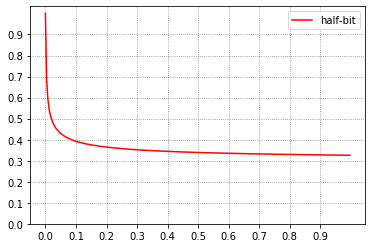

In [11]:
plt.plot(x_T[:-1], T[:-1], label = 'half-bit', color='red')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))

plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()


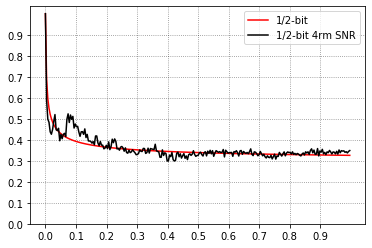

In [12]:
real_frc4rmSNR    = frc_util.frc_4rm_snr(r_ind, lena, noise1)

plt.plot(x_T[:-1], T[:-1], label = '1/2-bit', color='red')
plt.plot(x_T[:-1], real_frc4rmSNR[:-1], label = '1/2-bit 4rm SNR', color='black')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()


In our implementation, we split image pixels.
In particular, we make use of diagonal splitting 
such that each measurement ($I$) is diagonally split into four measurements
($\mathscr{I}_{1},\mathscr{I}_{2},\mathscr{I}_{3},\mathscr{I}_{4}$).
Each of these four splitted images differ in their corresponding noise
levels ($\mathscr{N}_{1},\mathscr{N}_{2},\mathscr{N}_{3},\mathscr{N}_{4}$)
while exhibiting same signal $s$.

In [13]:
nl1, nl2, nl3, nl4   = frc_util.diagonal_split(noisy_lena1)
lena1, lena2, lena3, lena4 = frc_util.diagonal_split(lena)

/home/beams0/PKC/Implementations/emprise_state_brain/FRC/pycodes/FRC_v3/frc_utils.py:65: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  s_a1 = x[ind]
/home/beams0/PKC/Implementations/emprise_state_brain/FRC/pycodes/FRC_v3/frc_utils.py:70: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  s_a2 = x[ind]
/home/beams0/PKC/Implementations/emprise_state_brain/FRC/pycodes/FRC_v3/frc_utils.py:75: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will b

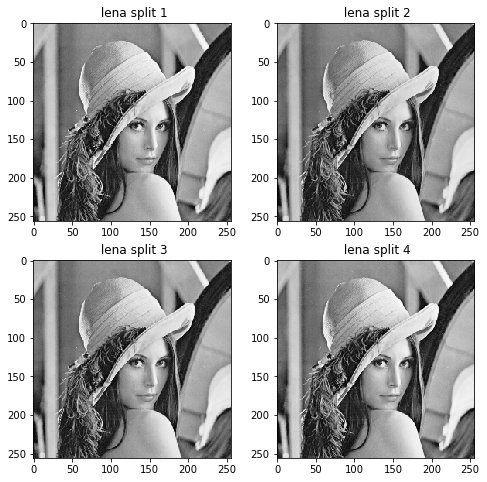

In [14]:
f, axrr = plt.subplots(2, 2, figsize=[8,8])

#f.colorbar(axrr[0].imshow(noise1, cmap='Greys_r'), ax=axrr[0])
axrr[0, 0].imshow(lena1, cmap='Greys_r')
axrr[0, 0].set_title(' lena split 1')
axrr[0, 1].imshow(lena2, cmap='Greys_r')
axrr[0, 1].set_title(' lena split 2')
axrr[1, 0].imshow(lena3, cmap='Greys_r')
axrr[1, 0].set_title(' lena split 3')
axrr[1, 1].imshow(lena4, cmap='Greys_r')
axrr[1, 1].set_title(' lena split 4')

plt.show()

In [15]:
xc, corr1, xt, thres = frc_util.FRC(nl1, nl2, thresholding='half-bit', inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)
xc, corr2, _ , _    = frc_util.FRC(nl3, nl4, thresholding='half-bit', inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)
splitted_frc = (corr1+corr2)/2

performed by index method
performed by index method
performed by index method
[*] Performing half-bit thresholding
performed by index method
performed by index method
performed by index method
[*] Performing half-bit thresholding


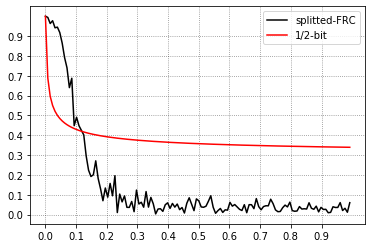

In [16]:
plt.plot(xc[:-1], splitted_frc[:-1], label = 'splitted-FRC', color='black')
plt.plot(xt[:-1], thres[:-1], label = '1/2-bit', color='red')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

In [22]:
1/0.13

7.692307692307692

performed by index method
performed by index method
performed by index method
[*] Performing half-bit thresholding


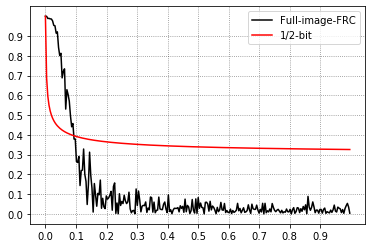

In [26]:
xf, wholefrc, xt, thres = frc_util.FRC(noisy_lena1, noisy_lena2, inscribed_rings=inscribed_rings, analytical_arc_based=anaRing)

plt.plot(xf[:-1], wholefrc[:-1], label = 'Full-image-FRC', color='black')
plt.plot(xt[:-1], thres[:-1], label = '1/2-bit', color='red')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

# FRC value from the two non-splitted images

In [24]:
1/0.095

10.526315789473685

# FRC from non-splitted images ~ FRC from splitted image x sqrt(2)

In [27]:
7.7*np.sqrt(2)

10.889444430272833